In [1]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)


Toggle code

In [2]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
import pylab as pl

# setting parameters for default matplotlib plots
%matplotlib inline

In [3]:
pl.style.use('fabiostyle')
# !mkdir ../img

# needs to find the library of functions
sys.path.append('../../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [4]:
NOTEBOOK_NAME = 'tuning_stability_values_time_bins'

In [5]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
#load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

In [6]:
sessions = 'expo','pre','post','ext1','ext2','renew'

In [7]:
for sess in 'pre','post','ext1','ext2','renew':
    exec('vars_%s = {}'%sess)
    exec("folder = '../%s/notebooks/autorestore/preprocessing/'"%sess)
    for var in ('time_ax', 'events', 'cycles', 'licks',
            'is_CSmt', 'is_rewardt',
            'odor_CSm_ons', 'odor_rw_ons', 'odor_CSm_offs', 'odor_rw_offs',
            'CYCLE_START', 'DELAY', 'CS_DURATION'): 
        exec('vars_%s.update({var:ut.load_variable(var, folder=folder)})'%sess)
    
vars_2_odor_expo = {}
folder = '../2_odor_expo/notebooks/autorestore/preprocessing/'
for var in ('time_ax', 'events', 'cycles', 'licks',
            'is_CSmt', 'is_rewardt',
            'odor_CSm_ons', 'odor_rw_ons', 'odor_CSm_offs', 'odor_rw_offs',
            'CYCLE_START', 'DELAY', 'CS_DURATION'): 
    vars_2_odor_expo.update({var:ut.load_variable(var, folder=folder)})

In [8]:
for sess in 'pre','post','ext1','ext2','renew':
    for bins in '05s','1s','2s':
        exec('selectivity_%s_%s = {}'%(sess, bins))
        exec("selectivity_%s_%s.update(ut.load_variable('selectivity_%s', folder='../%s/notebooks/autorestore/selectivity_time_bins/'))"%(sess,bins,bins,sess))

for sess in 'expo',:
    for bins in '05s','1s','2s':
        exec('selectivity_%s_%s = {}'%(sess, bins))
        exec("selectivity_%s_%s.update(ut.load_variable('selectivity_%s', folder='../2_odor_expo/notebooks/autorestore/selectivity_time_bins/'))"%(sess,bins,bins))
    

In [9]:
pvalue = 0.05

#### how to read selectivity variable:
    selectivity_A_B['C_D']
    A = session
    B = bin duration
    C = trial type
    D = time point where bin begins (wrt CS onset)
eg, selectivity_pre_05s['CSmt_3.5'] = pre session, 0.5s bins, CS- trial, 3.5-4s post CS onset

In [10]:
#for k in range(len(selectivity_pre_05s.keys())):
#     if '.' in selectivity_pre_05s.keys()[k]:
#            print selectivity_pre_05s.keys()[k].split('.')[0]+selectivity_pre_05s.keys()[k].split('.')[1]
#        

In [11]:
for sess in sessions:
    exec("new_%s = {}"%sess)
    for k in range(len(selectivity_pre_05s.keys())):
        if '.' in eval('np.sort(selectivity_%s_05s.keys())[%s]'%(sess,k)):
            exec("new_%s[%s] = np.sort(selectivity_%s_05s.keys())[k].split('.')[0]+np.sort(selectivity_%s_05s.keys())[k].split('.')[1]"%(sess,k,sess,sess))
    #print eval('np.sort(selectivity_%s_05s.keys())'%sess),
    print eval('new_%s'%sess)

{0: 'CSmt_05s', 2: 'CSmt_15s', 4: 'CSmt_25s', 6: 'CSmt_35s', 8: 'CSmt_45s', 10: 'CSmt_55s', 12: 'CSmt_65s', 14: 'rewardt_05s', 16: 'rewardt_15s', 18: 'rewardt_25s', 20: 'rewardt_35s', 22: 'rewardt_45s', 24: 'rewardt_55s', 26: 'rewardt_65s'}
{0: 'CSmt_05s', 2: 'CSmt_15s', 4: 'CSmt_25s', 6: 'CSmt_35s', 8: 'CSmt_45s', 10: 'CSmt_55s', 12: 'CSmt_65s', 14: 'rewardt_05s', 16: 'rewardt_15s', 18: 'rewardt_25s', 20: 'rewardt_35s', 22: 'rewardt_45s', 24: 'rewardt_55s', 26: 'rewardt_65s'}
{0: 'CSmt_05s', 2: 'CSmt_15s', 4: 'CSmt_25s', 6: 'CSmt_35s', 8: 'CSmt_45s', 10: 'CSmt_55s', 12: 'CSmt_65s', 14: 'rewardt_05s', 16: 'rewardt_15s', 18: 'rewardt_25s', 20: 'rewardt_35s', 22: 'rewardt_45s', 24: 'rewardt_55s', 26: 'rewardt_65s'}
{0: 'CSmt_05s', 2: 'CSmt_15s', 4: 'CSmt_25s', 6: 'CSmt_35s', 8: 'CSmt_45s', 10: 'CSmt_55s', 12: 'CSmt_65s', 14: 'rewardt_05s', 16: 'rewardt_15s', 18: 'rewardt_25s', 20: 'rewardt_35s', 22: 'rewardt_45s', 24: 'rewardt_55s', 26: 'rewardt_65s'}
{0: 'CSmt_05s', 2: 'CSmt_15s', 4: 'C

In [12]:
for sess in sessions:
    for k in range(len(selectivity_pre_05s.keys())):
        if '.' in eval('np.sort(selectivity_%s_05s.keys())[%s]'%(sess,k)):
            #print eval('np.sort(selectivity_%s_05s.keys())[%s]'%(sess,k))
            exec("selectivity_%s_05s[new_%s[%s]]=selectivity_%s_05s.pop(np.sort(selectivity_%s_05s.keys())[%s])"%(sess,sess,k,sess,sess,k))
            #print eval('np.sort(selectivity_%s_05s.keys())[%s]'%(sess,k))
    #print eval('np.sort(selectivity_%s_05s.keys())'%sess),
    

In [13]:
invalid = {'rewardt_licks'}
def without_licks(d, keys):
    return {x: d[x] for x in d if x not in keys}

#for key in without_licks(selectivity_pre_05s, invalid):
#    print key
            

In [14]:
for sess in sessions:
    for bins in '05s',:
        for trial in 'rewardt',:
            for key in selectivity_pre_05s.keys():
                exec("pvalues_%s_%s_%s_CS = ut.adjust_pvalues([s[0][-1] for s in selectivity_%s_%s['%s_%s']])"%(sess,bins,(key.split('_')[1]),sess,bins,trial,key.split('_')[1]))
                exec("d_up = np.r_[[s[1]>0 for s in selectivity_%s_%s['%s']]]"%(sess,bins,key))
                exec("d_dn = np.r_[[s[1]<0 for s in selectivity_%s_%s['%s']]]"%(sess,bins,key))
                exec("cells_%s_%s_%s_CS_up = (pvalues_%s_%s_%s_CS < pvalue) * d_up"%(sess,bins,(key.split('_')[1]),sess,bins,(key.split('_')[1])))
                exec("cells_%s_%s_%s_CS_dn = (pvalues_%s_%s_%s_CS < pvalue) * d_dn"%(sess,bins,(key.split('_')[1]),sess,bins,(key.split('_')[1])))

for sess in sessions:
    for bins in '05s',:
        for trial in 'CSmt',:
            for key in without_licks(selectivity_pre_05s, invalid):
                exec("pvalues_%s_%s_%s_CSm = ut.adjust_pvalues([s[0][-1] for s in selectivity_%s_%s['%s_%s']])"%(sess,bins,(key.split('_')[1]),sess,bins,trial,key.split('_')[1]))
                exec("d_up = np.r_[[s[1]>0 for s in selectivity_%s_%s['%s']]]"%(sess,bins,key))
                exec("d_dn = np.r_[[s[1]<0 for s in selectivity_%s_%s['%s']]]"%(sess,bins,key))
                exec("cells_%s_%s_%s_CSm_up = (pvalues_%s_%s_%s_CSm < pvalue) * d_up"%(sess,bins,(key.split('_')[1]),sess,bins,(key.split('_')[1])))
                exec("cells_%s_%s_%s_CSm_dn = (pvalues_%s_%s_%s_CSm < pvalue) * d_dn"%(sess,bins,(key.split('_')[1]),sess,bins,(key.split('_')[1])))

In [15]:
for sess in sessions:
    for bins in '1s',:
        for trial in 'rewardt',:
            for key in selectivity_pre_1s.keys():
                exec("pvalues_%s_%s_%s_CS = ut.adjust_pvalues([s[0][-1] for s in selectivity_%s_%s['%s_%s']])"%(sess,bins,(key.split('_')[1]),sess,bins,trial,key.split('_')[1]))
                exec("d_up = np.r_[[s[1]>0 for s in selectivity_%s_%s['%s']]]"%(sess,bins,key))
                exec("d_dn = np.r_[[s[1]<0 for s in selectivity_%s_%s['%s']]]"%(sess,bins,key))
                exec("cells_%s_%s_%s_CS_up = (pvalues_%s_%s_%s_CS < pvalue) * d_up"%(sess,bins,(key.split('_')[1]),sess,bins,(key.split('_')[1])))
                exec("cells_%s_%s_%s_CS_dn = (pvalues_%s_%s_%s_CS < pvalue) * d_dn"%(sess,bins,(key.split('_')[1]),sess,bins,(key.split('_')[1])))

for sess in sessions:
    for bins in '1s',:
        for trial in 'CSmt',:
            for key in without_licks(selectivity_pre_1s, invalid):
                exec("pvalues_%s_%s_%s_CSm = ut.adjust_pvalues([s[0][-1] for s in selectivity_%s_%s['%s_%s']])"%(sess,bins,(key.split('_')[1]),sess,bins,trial,key.split('_')[1]))
                exec("d_up = np.r_[[s[1]>0 for s in selectivity_%s_%s['%s']]]"%(sess,bins,key))
                exec("d_dn = np.r_[[s[1]<0 for s in selectivity_%s_%s['%s']]]"%(sess,bins,key))
                exec("cells_%s_%s_%s_CSm_up = (pvalues_%s_%s_%s_CSm < pvalue) * d_up"%(sess,bins,(key.split('_')[1]),sess,bins,(key.split('_')[1])))
                exec("cells_%s_%s_%s_CSm_dn = (pvalues_%s_%s_%s_CSm < pvalue) * d_dn"%(sess,bins,(key.split('_')[1]),sess,bins,(key.split('_')[1])))

In [16]:
for sess in sessions:
    for bins in '2s',:
        for trial in 'rewardt',:
            for key in selectivity_pre_2s.keys():
                exec("pvalues_%s_%s_%s_CS = ut.adjust_pvalues([s[0][-1] for s in selectivity_%s_%s['%s_%s']])"%(sess,bins,(key.split('_')[1]),sess,bins,trial,key.split('_')[1]))
                exec("d_up = np.r_[[s[1]>0 for s in selectivity_%s_%s['%s']]]"%(sess,bins,key))
                exec("d_dn = np.r_[[s[1]<0 for s in selectivity_%s_%s['%s']]]"%(sess,bins,key))
                exec("cells_%s_%s_%s_CS_up = (pvalues_%s_%s_%s_CS < pvalue) * d_up"%(sess,bins,(key.split('_')[1]),sess,bins,(key.split('_')[1])))
                exec("cells_%s_%s_%s_CS_dn = (pvalues_%s_%s_%s_CS < pvalue) * d_dn"%(sess,bins,(key.split('_')[1]),sess,bins,(key.split('_')[1])))

for sess in sessions:
    for bins in '2s',:
        for trial in 'CSmt',:
            for key in without_licks(selectivity_pre_2s, invalid):
                exec("pvalues_%s_%s_%s_CSm = ut.adjust_pvalues([s[0][-1] for s in selectivity_%s_%s['%s_%s']])"%(sess,bins,(key.split('_')[1]),sess,bins,trial,key.split('_')[1]))
                exec("d_up = np.r_[[s[1]>0 for s in selectivity_%s_%s['%s']]]"%(sess,bins,key))
                exec("d_dn = np.r_[[s[1]<0 for s in selectivity_%s_%s['%s']]]"%(sess,bins,key))
                exec("cells_%s_%s_%s_CSm_up = (pvalues_%s_%s_%s_CSm < pvalue) * d_up"%(sess,bins,(key.split('_')[1]),sess,bins,(key.split('_')[1])))
                exec("cells_%s_%s_%s_CSm_dn = (pvalues_%s_%s_%s_CSm < pvalue) * d_dn"%(sess,bins,(key.split('_')[1]),sess,bins,(key.split('_')[1])))

In [17]:
# import csv
CSp_05s_values=[]   # initializing values list
CSp_05s_mean_values=[]
# a = autorestore_folder.split('/')[:-3]
# data_folder = os.path.join('/', *a)

session = ['expo','pre','post','ext1','ext2','renew']
feature = selectivity_pre_05s.keys()
direction = ['up', 'dn']
for f in feature:
    for d in direction:
        for s in session:
            c = 'cells_%s_05s_%s_CS_%s' %(s,f.split('_')[1],d)
            cc = eval(c)
            CSp_05s_values.append([c,cc])
            CSp_05s_mean_values.append(np.mean(cc))

# #write to .csv file
# csvfile = os.path.join(data_folder, 'CSp_selectivity_values.csv')

# with open(csvfile, "w") as output:
#     writer = csv.writer(output, lineterminator='\n')
#     for v in CSp_values:
#         writer.writerow([v[0],np.mean(v[1])])

In [18]:
CSp_1s_values=[]   # initializing values list
CSp_1s_mean_values=[]

session = ['expo','pre','post','ext1','ext2','renew']
feature = selectivity_pre_1s.keys()
direction = ['up', 'dn']
for f in feature:
    for d in direction:
        for s in session:
            c = 'cells_%s_1s_%s_CS_%s' %(s,f.split('_')[1],d)
            cc = eval(c)
            CSp_1s_values.append([c,cc])
            CSp_1s_mean_values.append(np.mean(cc))

CSp_2s_values=[]   # initializing values list
CSp_2s_mean_values=[]

session = ['expo','pre','post','ext1','ext2','renew']
feature = selectivity_pre_2s.keys()
direction = ['up', 'dn']
for f in feature:
    for d in direction:
        for s in session:
            c = 'cells_%s_2s_%s_CS_%s' %(s,f.split('_')[1],d)
            cc = eval(c)
            CSp_2s_values.append([c,cc])
            CSp_2s_mean_values.append(np.mean(cc))

In [19]:
CSm_05s_values=[]   # initializing values list
CSm_05s_mean_values=[]

session = ['expo','pre','post','ext1','ext2','renew']
feature =  without_licks(selectivity_pre_05s, invalid).keys()
direction = ['up', 'dn']
for f in feature:
    for d in direction:
        for s in session:
            c = 'cells_%s_05s_%s_CSm_%s' %(s,f.split('_')[1],d)
            cc = eval(c)
            CSm_05s_values.append([c,cc])
            CSm_05s_mean_values.append(np.mean(cc))

CSm_1s_values=[]   # initializing values list
CSm_1s_mean_values=[]

session = ['expo','pre','post','ext1','ext2','renew']
feature =  without_licks(selectivity_pre_1s, invalid).keys()
direction = ['up', 'dn']
for f in feature:
    for d in direction:
        for s in session:
            c = 'cells_%s_1s_%s_CSm_%s' %(s,f.split('_')[1],d)
            cc = eval(c)
            CSm_1s_values.append([c,cc])
            CSm_1s_mean_values.append(np.mean(cc))

CSm_2s_values=[]   # initializing values list
CSm_2s_mean_values=[]

session = ['expo','pre','post','ext1','ext2','renew']
feature =  without_licks(selectivity_pre_2s, invalid).keys()
direction = ['up', 'dn']
for f in feature:
    for d in direction:
        for s in session:
            c = 'cells_%s_2s_%s_CSm_%s' %(s,f.split('_')[1],d)
            cc = eval(c)
            CSm_2s_values.append([c,cc])
            CSm_2s_mean_values.append(np.mean(cc))

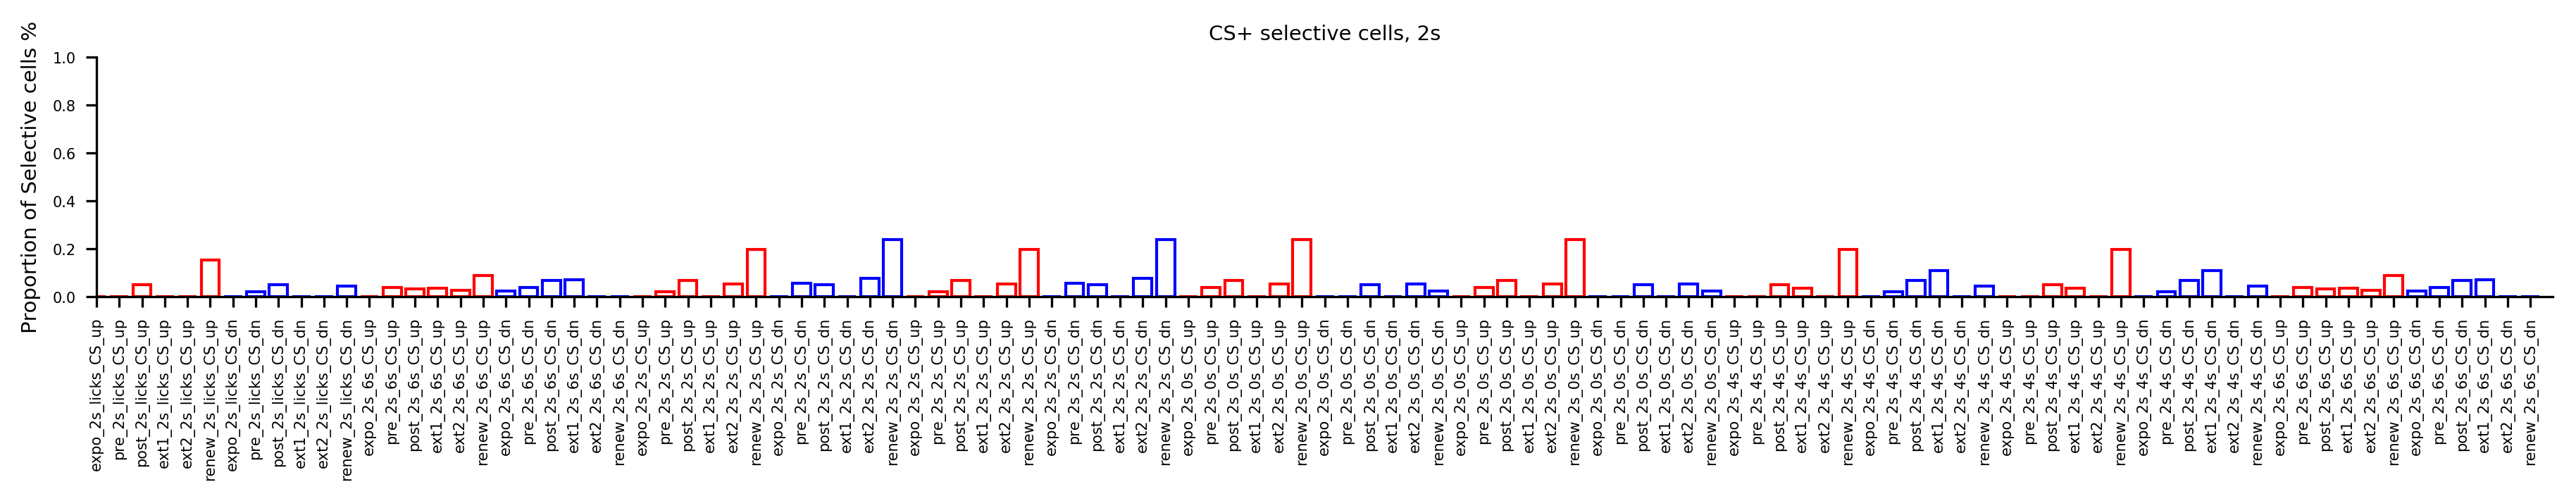

In [20]:
p_names=[] # initializing names list
p = [b[0] for b in CSp_2s_values]
for x in range(0,len(CSp_2s_values)):
        new = p[x][6:]
        p_names.append(new)

fig, ax = pl.subplots(1, 1, figsize=(15, 1.5))
values = CSp_2s_mean_values
pt.plot_bars(values, colors=['red','red','red','red','red','red','blue','blue','blue','blue','blue','blue'], ax=ax)
ax.set_xlim(0,len(CSp_2s_values))
ax.set_xticks(range(len(CSp_2s_values)))
ax.set_xticklabels(p_names, rotation=90)
#pt.nicer_plot(ax)
ax.set_ylabel('Proportion of Selective cells %')
ax.set_ylim(0, 1)
ax.set_title('CS+ selective cells, 2s')

#fig.savefig('../img/proportion_selective_CSp.pdf')

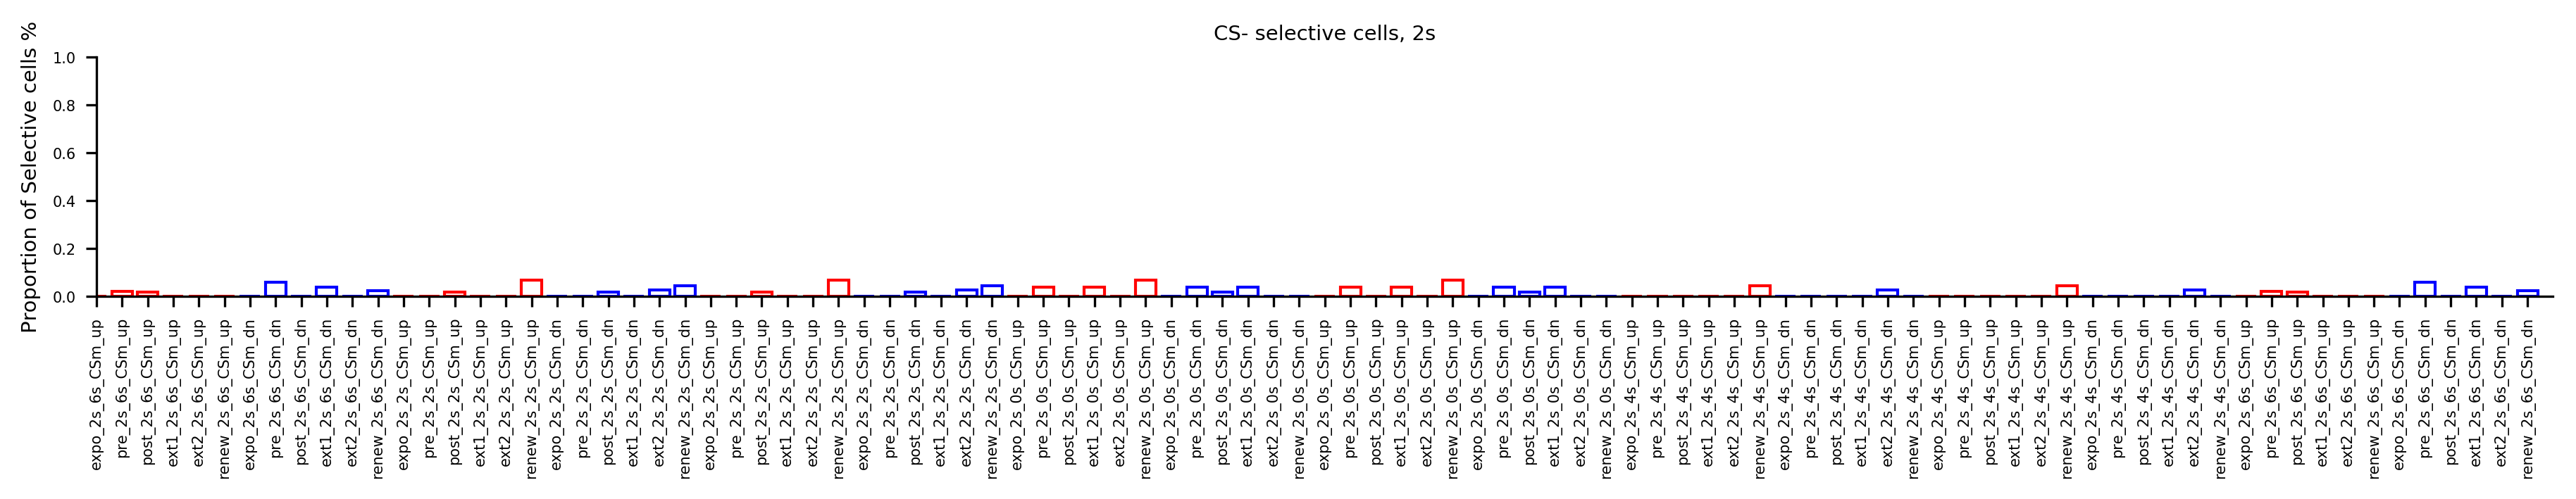

In [21]:
p_names=[] # initializing names list
p = [b[0] for b in CSm_2s_values]
for x in range(0,len(CSm_2s_values)):
        new = p[x][6:]
        p_names.append(new)

fig, ax = pl.subplots(1, 1, figsize=(15, 1.5))
values = CSm_2s_mean_values
pt.plot_bars(values, colors=['red','red','red','red','red','red','blue','blue','blue','blue','blue','blue'], ax=ax)
ax.set_xlim(0,len(CSm_2s_values))
ax.set_xticks(range(len(CSm_2s_values)))
ax.set_xticklabels(p_names, rotation=90)
#pt.nicer_plot(ax)
ax.set_ylabel('Proportion of Selective cells %')
ax.set_ylim(0, 1)
ax.set_title('CS- selective cells, 2s')

#fig.savefig('../img/proportion_selective_CSm.pdf')

In [22]:
save_workspace(db)

Could not store variable 'di'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'sys'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'np'. Skipping...
Could not store variable 'IPython'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'os'. Skipping...


In [23]:
#import csv
#a = autorestore_folder.split('/')[:-3]
#data_folder = os.path.join('/', *a)
#animal_ID = data_folder[-4:]


#write CSp data to .csv file
#csvfile = os.path.join(data_folder, 'CSp_selectivity_values_'+animal_ID+'.csv')

#with open(csvfile, "w") as output:
#    writer = csv.writer(output, lineterminator='\n')
#    for v in CSp_values:
#        writer.writerow([v[0],np.mean(v[1])])

#write to CSm data to .csv file
#csvfile = os.path.join(data_folder, 'CSm_selectivity_values_'+animal_ID+'.csv')
#
#with open(csvfile, "w") as output:
#    writer = csv.writer(output, lineterminator='\n')
#    for v in CSm_values:
#        writer.writerow([v[0],np.mean(v[1])])